In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset_train = pd.read_csv("Google_Stock_Price_Test.csv")

In [5]:
dataset_train.head()

Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400

In [6]:
train = dataset_train.loc[:,["Open"]].values
train

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])

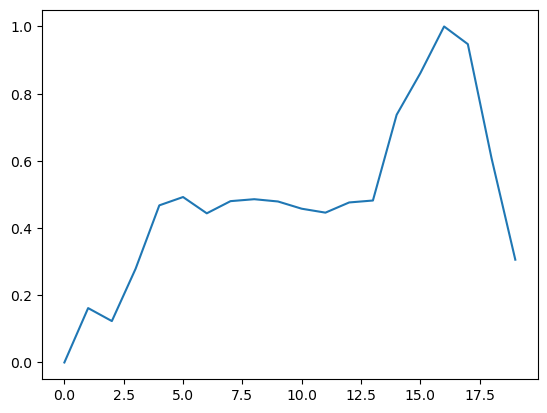

In [9]:
plt.plot(train_scaled)
plt.show()

In [22]:
x_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

IndexError: tuple index out of range

In [26]:
x_train

array([array([0.        , 0.16186441, 0.12322034, 0.27881356, 0.46762712,
              0.49237288, 0.44389831, 0.48016949, 0.4859322 , 0.47915254,
              0.45762712, 0.4459322 , 0.47627119, 0.4820339 , 0.73711864,
              0.86118644, 1.        , 0.94745763, 0.60762712, 0.3059322 ]),
       array([0.16186441, 0.12322034, 0.27881356, 0.46762712, 0.49237288,
              0.44389831, 0.48016949, 0.4859322 , 0.47915254, 0.45762712,
              0.4459322 , 0.47627119, 0.4820339 , 0.73711864, 0.86118644,
              1.        , 0.94745763, 0.60762712, 0.3059322 ])           ,
       array([0.12322034, 0.27881356, 0.46762712, 0.49237288, 0.44389831,
              0.48016949, 0.4859322 , 0.47915254, 0.45762712, 0.4459322 ,
              0.47627119, 0.4820339 , 0.73711864, 0.86118644, 1.        ,
              0.94745763, 0.60762712, 0.3059322 ])                       ,
       ..., array([], dtype=float64), array([], dtype=float64),
       array([], dtype=float64)], dtype=obje

In [14]:
y_train

array([], dtype=float64)

In [16]:
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
dataset_test.head()

Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400

In [17]:
real_stock_price = dataset_test.loc[:, ["Open"]].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)
inputs

array([[0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ],
       [0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])